# <center>Plotly</center>


In [102]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

import plotly.figure_factory as ff

In [42]:
match_df = pd.read_csv('Datasets/matches.csv')
match_df.columns = match_df.columns.str.strip()
match_df.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [43]:
delivery_df = pd.read_csv('Datasets/deliveries.csv')
delivery_df.columns = delivery_df.columns.str.strip()
delivery_df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NA,NA,NaN


In [44]:
ipl = delivery_df.merge(match_df, left_on='match_id', right_on='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


## Scatter Plot


- Scatter Plot aee drawn between two continous values.


- PROBLEM: we are going to draw a scatter plot between Batsman Average and Batsman Strike Rate of the top 50 batsman in IPL.


In [45]:
# Avg VS SR grpah of top 50 batsmans in terms of total runs:

top50 = ipl.groupby('batter')['batsman_runs'].sum().sort_values(
    ascending=False).head(50).index.tolist()

top50ipl = ipl[ipl['batter'].isin(top50)]

In [46]:
# Calculating SR

runs = top50ipl.groupby('batter')['batsman_runs'].sum()
balls = top50ipl.groupby('batter')['batsman_runs'].count()

sr = (runs / balls) * 100

# For converting the series into dataframes:
sr = sr.reset_index()

sr

,batter,batsman_runs
0,AB de Villiers,148.580442
1,AD Russell,164.224422
2,AJ Finch,123.349057
3,AM Rahane,120.321410
4,AT Rayudu,124.584527
5,BB McCullum,126.848592
6,CH Gayle,142.121729
7,DA Miller,134.684477
8,DA Warner,135.429986
9,DR Smith,132.279534


In [47]:
# Calculating Average:
# avg = (total number of runs / number of outs)

outs = ipl[ipl['player_dismissed'].isin(top50)]
num_outs = outs['player_dismissed'].value_counts()

avg = runs / num_outs

avg = avg.reset_index()

avg.rename(columns={'index': 'batter', 0: 'avg'}, inplace=True)

avg = avg.merge(sr, on='batter')

avg

,batter,avg,batsman_runs
0,AB de Villiers,39.853846,148.580442
1,AD Russell,28.930233,164.224422
2,AJ Finch,24.904762,123.349057
3,AM Rahane,30.142857,120.321410
4,AT Rayudu,28.051613,124.584527
5,BB McCullum,27.711538,126.848592
6,CH Gayle,39.658730,142.121729
7,DA Miller,35.658537,134.684477
8,DA Warner,40.042683,135.429986
9,DR Smith,28.392857,132.279534


In [75]:
# trace = go.Scatter(x = , y = , mode = )
# data = [trace]
# layout = go.Layout()
# fig = go.Figure(data = , layout = )
# pyo.plot(fig)


trace = go.Scatter(x=avg['avg'],
                   y=avg['batsman_runs'],
                   mode='markers',
                   text=avg['batter'],
                   marker={'color': '#428cd5', 'size': 5})


data = [trace]


layout = go.Layout(title='Batsman Avg vs SR',
                   xaxis={'title': 'Batsman Average'},
                   yaxis={'title': 'Batsman Strike Rate'}
                   )


fig = go.Figure(data=data, layout=layout)


pyo.plot(fig, filename='scatterGraph.html')

'scatterGraph.html'

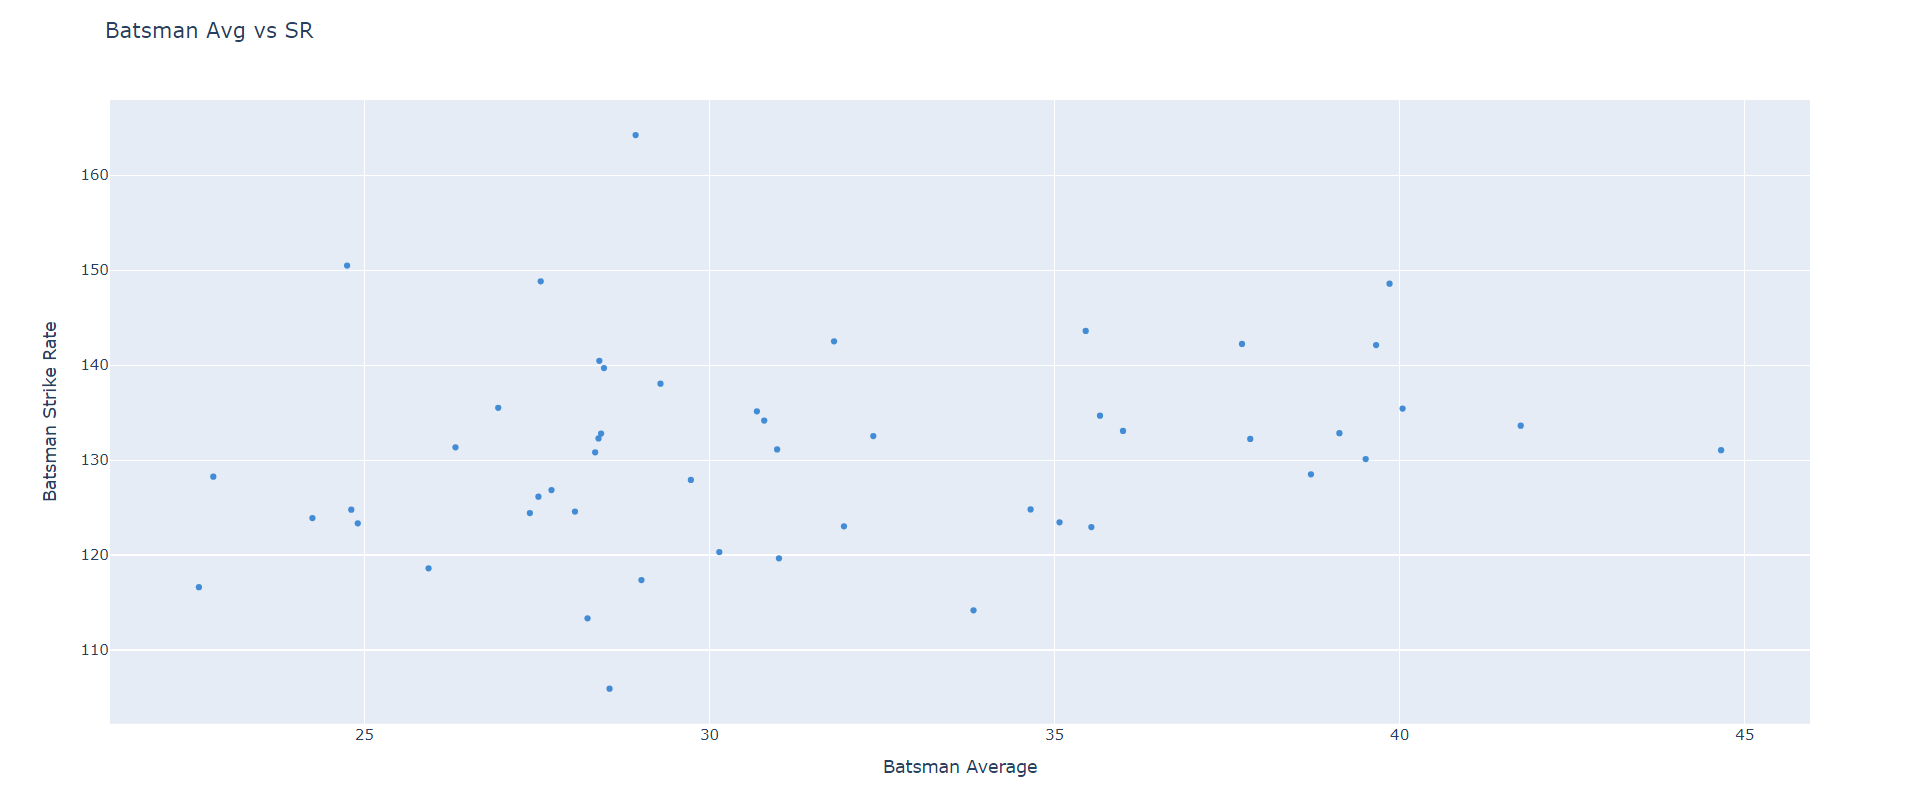


## Line Chart


- Batsman's year by year performance:


In [49]:
ipl.columns = ipl.columns.str.strip()

In [50]:
ipl = ipl.map(lambda x: x.strip() if isinstance(x, str) else x)

In [51]:
player1 = ipl[ipl['batter'] == 'V Kohli']
performance1 = player1.groupby('season')['batsman_runs'].sum().reset_index()

player2 = ipl[ipl['batter'] == 'MS Dhoni']
performance2 = player2.groupby('season')['batsman_runs'].sum().reset_index()

In [76]:

trace1 = go.Scatter(x=performance1['season'],
                    y=performance1['batsman_runs'],
                    # mode = 'lines',
                    text='V Kohli',
                    mode='lines + markers',
                    marker={'color': '#00A65A'},
                    name='V Kohli')


trace2 = go.Scatter(x=performance2['season'],
                    y=performance2['batsman_runs'],
                    text='MS Dhoni',
                    mode='lines + markers',
                    name='MS Dhoni')


data = [trace1, trace2]


layout = go.Layout(title='Year By Year Performance',
                   xaxis={'title': 'Season'},
                   yaxis={'title': 'Batsman Total Runs'}
                   )


fig = go.Figure(data=data, layout=layout)


pyo.plot(fig, filename='lineGraph.html')

'lineGraph.html'

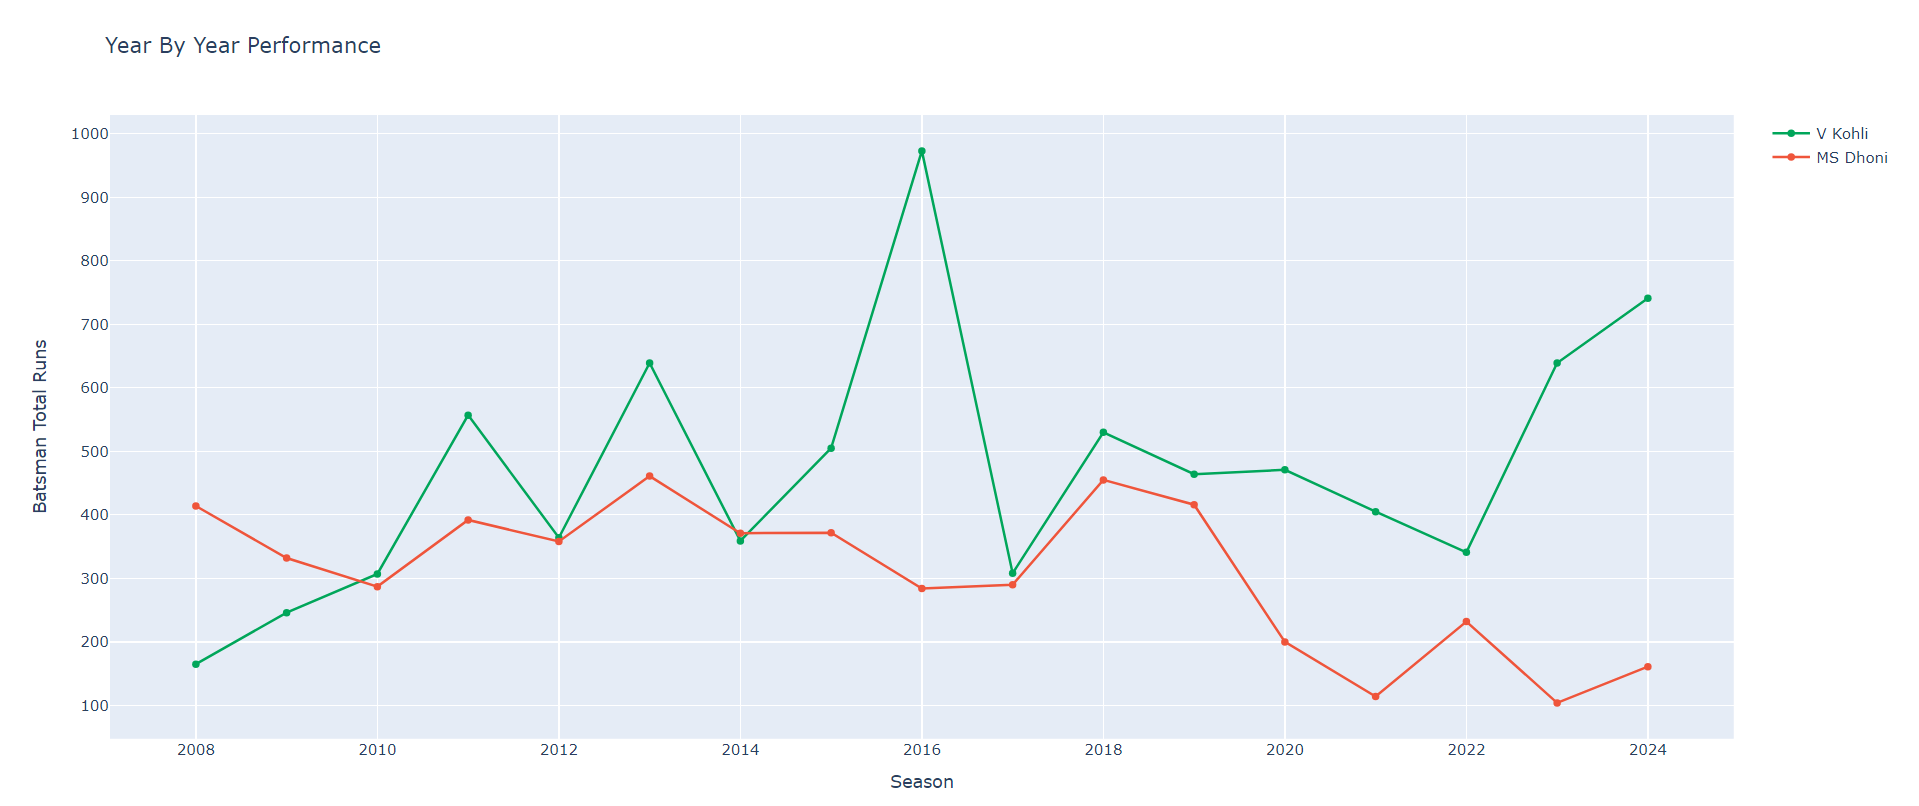


In [53]:
def batsmanComparison(*names):
    data = []
    for name in names:
        player = ipl[ipl['batter'] == name]
        performance = player.groupby(
            'season')['batsman_runs'].sum().reset_index()

        trace = go.Scatter(x=performance['season'],
                           y=performance['batsman_runs'],
                           text=name,
                           mode='lines+markers',
                           name=name)

        data.append(trace)

    layout = go.Layout(title='Batsman Record Comparator',
                       xaxis={'title': 'Season'},
                       yaxis={'title': 'Batsman Total Runs'})

    fig = go.Figure(data=data, layout=layout)

    pyo.plot(fig, filename='batsmanComparator.html')


# Call the function with names of players for the comparison
batsmanComparison('V Kohli', 'MS Dhoni', 'G Gambhir',
                  'RG Sharma', 'Shubman Gill')

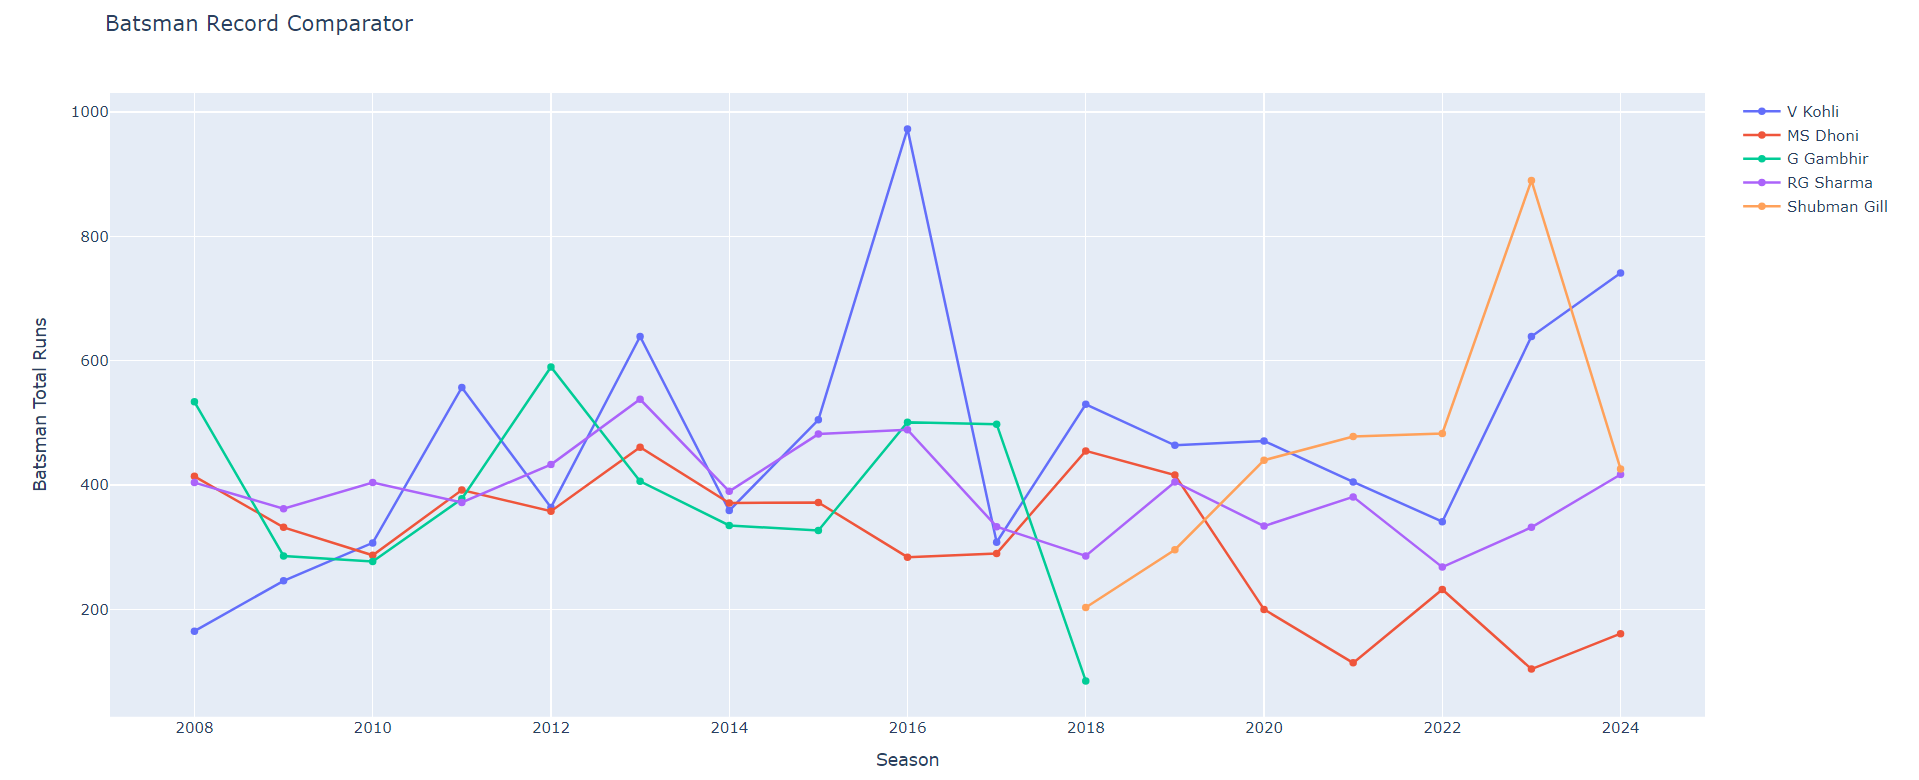


## Bar Graph


In [54]:
# Top 10 Batsman in the IPL with respect to the runs:

top10 = ipl.groupby('batter')['batsman_runs'].sum().sort_values(
    ascending=False).head(10).index.tolist()
top10_df = ipl[ipl['batter'].isin(top10)]

In [55]:
top10_score = top10_df.groupby('batter')['batsman_runs'].sum().reset_index()

top10_score

,batter,batsman_runs
0,AB de Villiers,5181
1,CH Gayle,4997
2,DA Warner,6567
3,KD Karthik,4843
4,MS Dhoni,5243
5,RG Sharma,6630
6,RV Uthappa,4954
7,S Dhawan,6769
8,SK Raina,5536
9,V Kohli,8014


In [71]:
trace = go.Bar(x=top10_score['batter'], y=top10_score['batsman_runs'])

data = [trace]

layout = go.Layout(title="Top 10 Batters In IPL",
                   xaxis={'title': 'Batsman'},
                   yaxis={'title': 'Total Runs'}
                   )
fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='normalBarGraph.html')

'normalBarGraph.html'

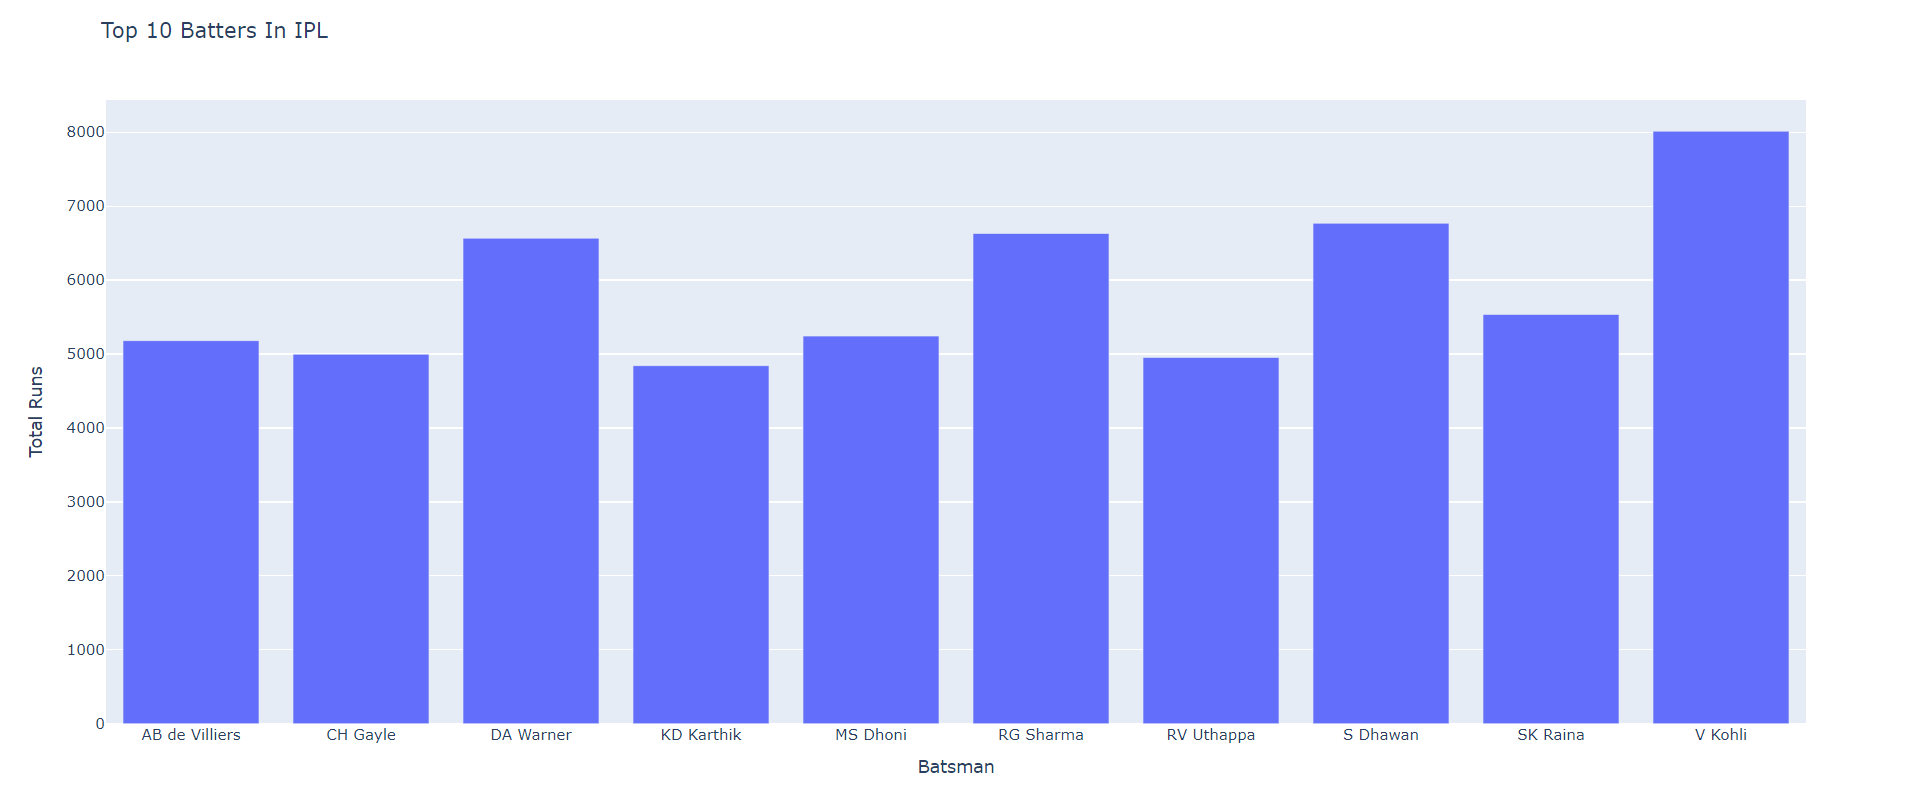


**There are 3 types of bar graph:**

- Nested Bar Graph
- Stacked Bar Graph
- Overlayed Bar Graph


In [57]:
innings = top10_df.groupby(['batter', 'inning'])[
    'batsman_runs'].sum().reset_index()

mask1 = innings['inning'] == 1
mask2 = innings['inning'] == 2

first = innings[mask1]
second = innings[mask2]

first.rename(columns={'batsman_runs': '1st Innings'}, inplace=True)
second.rename(columns={'batsman_runs': '2nd Innings'}, inplace=True)

result = first.merge(second, on='batter')[
    ['batter', '1st Innings', '2nd Innings']]

result

C:\Users\avina\AppData\Local\Temp\ipykernel_9140\1662636709.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\avina\AppData\Local\Temp\ipykernel_9140\1662636709.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,batter,1st Innings,2nd Innings
0,AB de Villiers,3163,1999
1,CH Gayle,2873,2092
2,DA Warner,3280,3285
3,KD Karthik,2743,2099
4,MS Dhoni,3065,2178
5,RG Sharma,3600,3028
6,RV Uthappa,2120,2832
7,S Dhawan,3926,2843
8,SK Raina,3194,2334
9,V Kohli,4400,3604


### Overlay Mode


In [72]:
trace1 = go.Bar(x=result['batter'],
                y=result['1st Innings'],
                name='1st Innings',
                marker={'color': '#d253ac'}
                )


trace2 = go.Bar(x=result['batter'],
                y=result['2nd Innings'],
                name='2nd Innings',
                marker={'color': '#3bbdf9'}
                )

data = [trace1, trace2]

layout = go.Layout(title="Innings Wise Runs By Top 10 Batters",
                   xaxis={'title': 'Batsman'},
                   yaxis={'title': 'Runs'},
                   barmode='overlay'
                   )


fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='overlayBarGraph.html')

'overlayBarGraph.html'

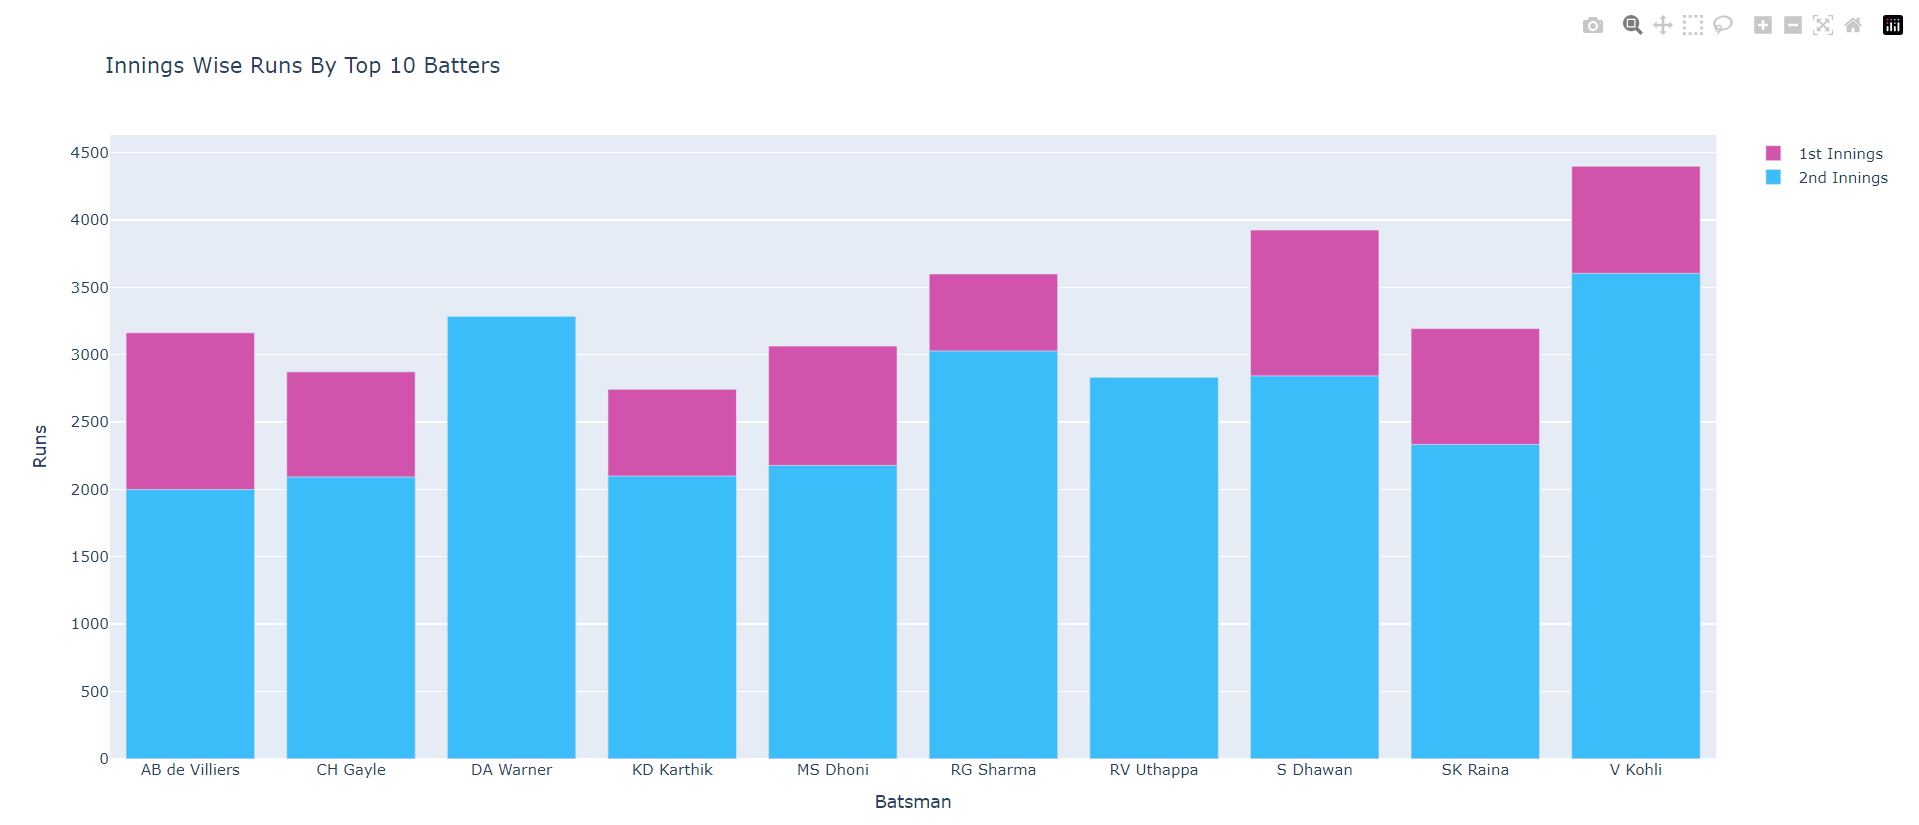


### Stack Mode


In [73]:
trace1 = go.Bar(x=result['batter'],
                y=result['1st Innings'],
                name='1st Innings',
                marker={'color': '#d253ac'}
                )


trace2 = go.Bar(x=result['batter'],
                y=result['2nd Innings'],
                name='2nd Innings',
                marker={'color': '#3bbdf9'}
                )

data = [trace1, trace2]

layout = go.Layout(title="Innings Wise Runs By Top 10 Batters",
                   xaxis={'title': 'Batsman'},
                   yaxis={'title': 'Runs'},
                   barmode='stack'
                   )


fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='stackBarGraph.html')

'stackBarGraph.html'

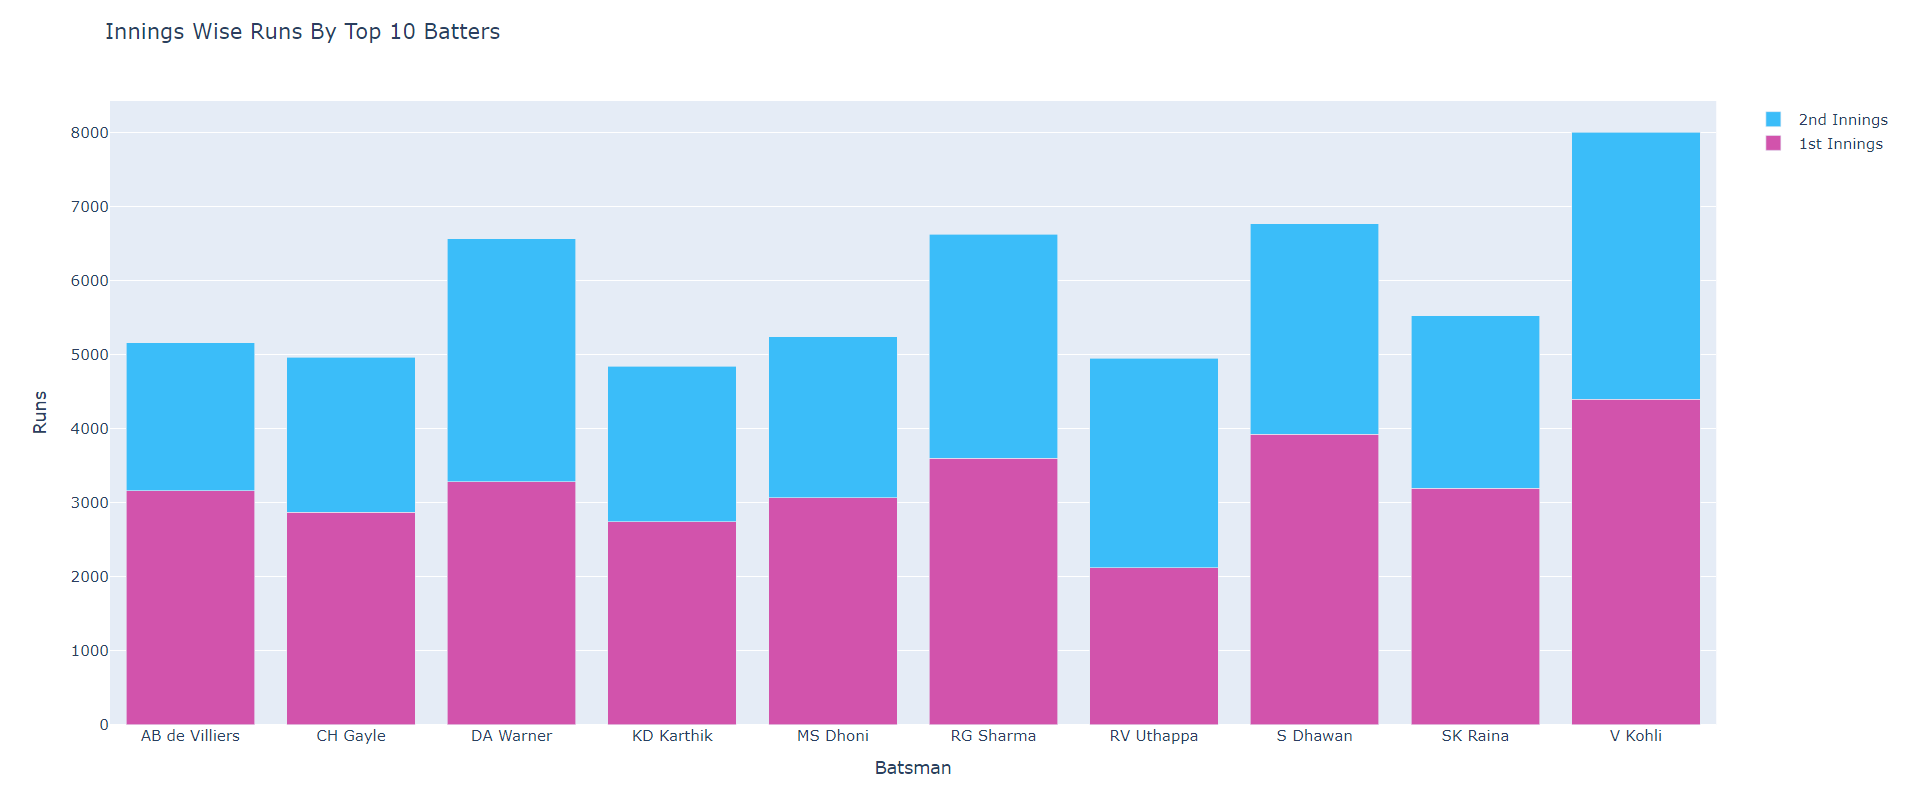


### Nested Mode

The Default Mode


In [74]:
trace1 = go.Bar(x=result['batter'],
                y=result['1st Innings'],
                name='1st Innings',
                marker={'color': '#d253ac'}
                )


trace2 = go.Bar(x=result['batter'],
                y=result['2nd Innings'],
                name='2nd Innings',
                marker={'color': '#3bbdf9'}
                )

data = [trace1, trace2]

layout = go.Layout(title="Innings Wise Runs By Top 10 Batters",
                   xaxis={'title': 'Batsman'},
                   yaxis={'title': 'Runs'}
                   )


fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='nestedBarGraph.html')

'nestedBarGraph.html'

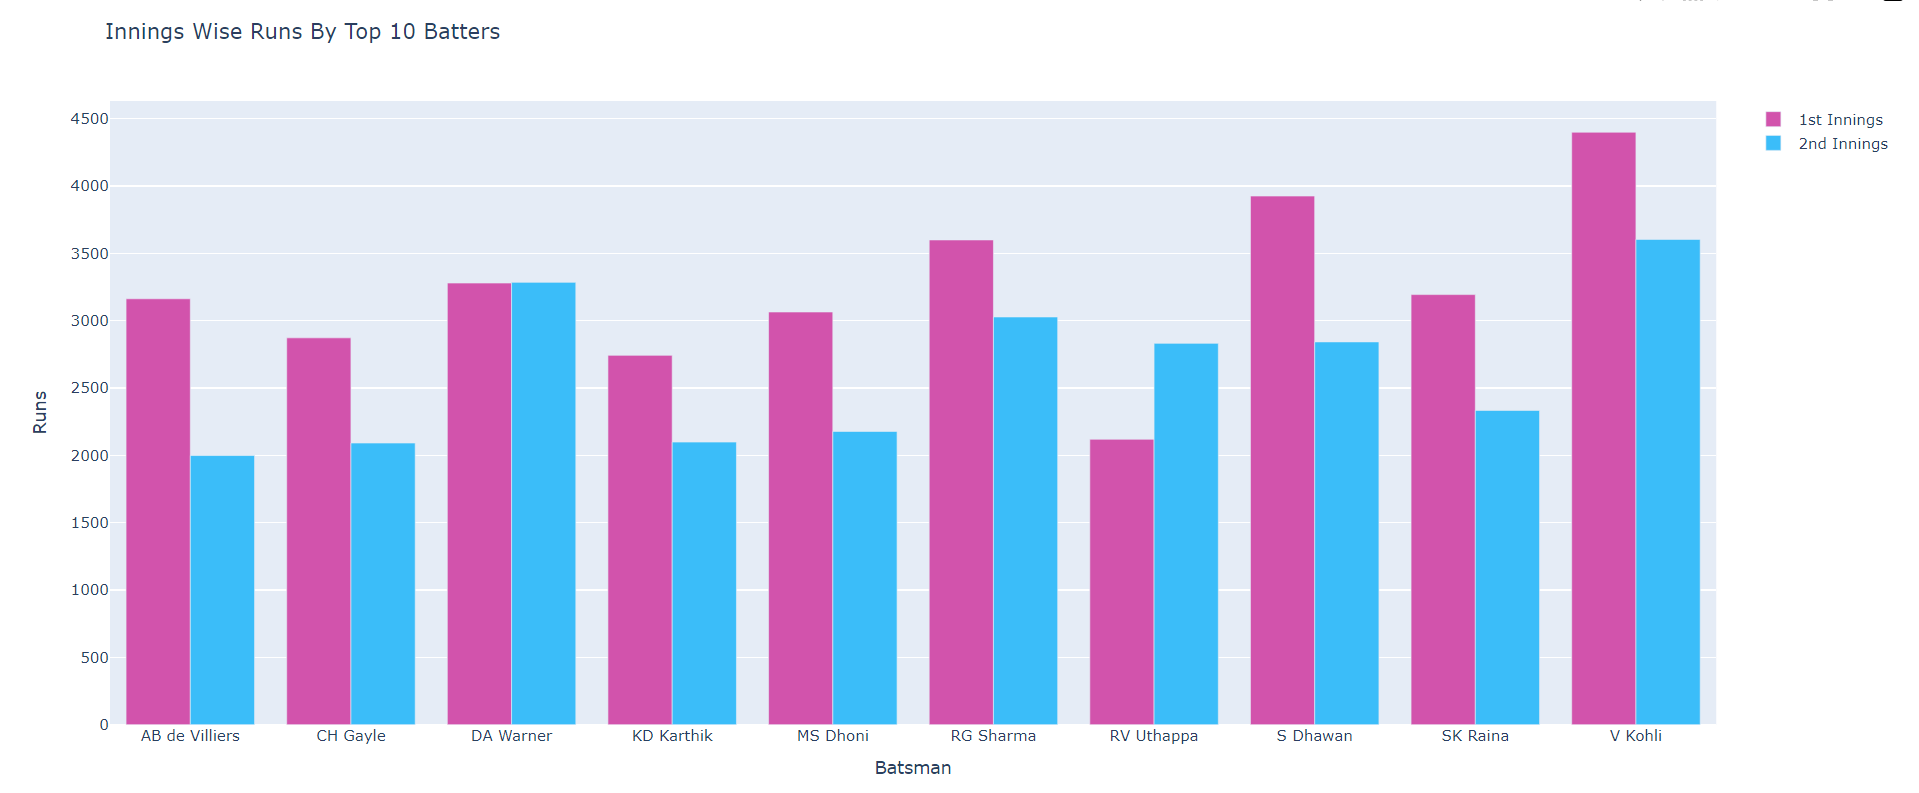


## Bubble Plot


In [92]:
top50ipl = top50ipl[top50ipl['batsman_runs'] == 6]


batterSixHit = top50ipl.groupby('batter')['batsman_runs'].count().reset_index()


newTop50ipl = avg.merge(batterSixHit, on='batter')

# newTop50ipl


# Generate a list of colors from Plotly's qualitative color scale
colors = px.colors.qualitative.Alphabet
# Create a color mapping for each batter
color_mapping = {batter: colors[i % len(colors)]
                 for i, batter in enumerate(newTop50ipl['batter'])}
# Apply the color mapping to the color column
newTop50ipl['color'] = newTop50ipl['batter'].map(color_mapping)


trace = go.Scatter(x=newTop50ipl['avg'],
                   y=newTop50ipl['batsman_runs_x'],
                   text=newTop50ipl['batter'],
                   mode='markers',
                   marker={'size': newTop50ipl['batsman_runs_y'],
                           'color': newTop50ipl['color']}
                   )


data = [trace]


layout = go.Layout(title="Top 50 Batters Avg vs SR with No. of 6's",
                   xaxis={'title': 'Average'},
                   yaxis={'title': 'SR'}
                   )


fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='bubbleGraph.html')

'bubbleGraph.html'

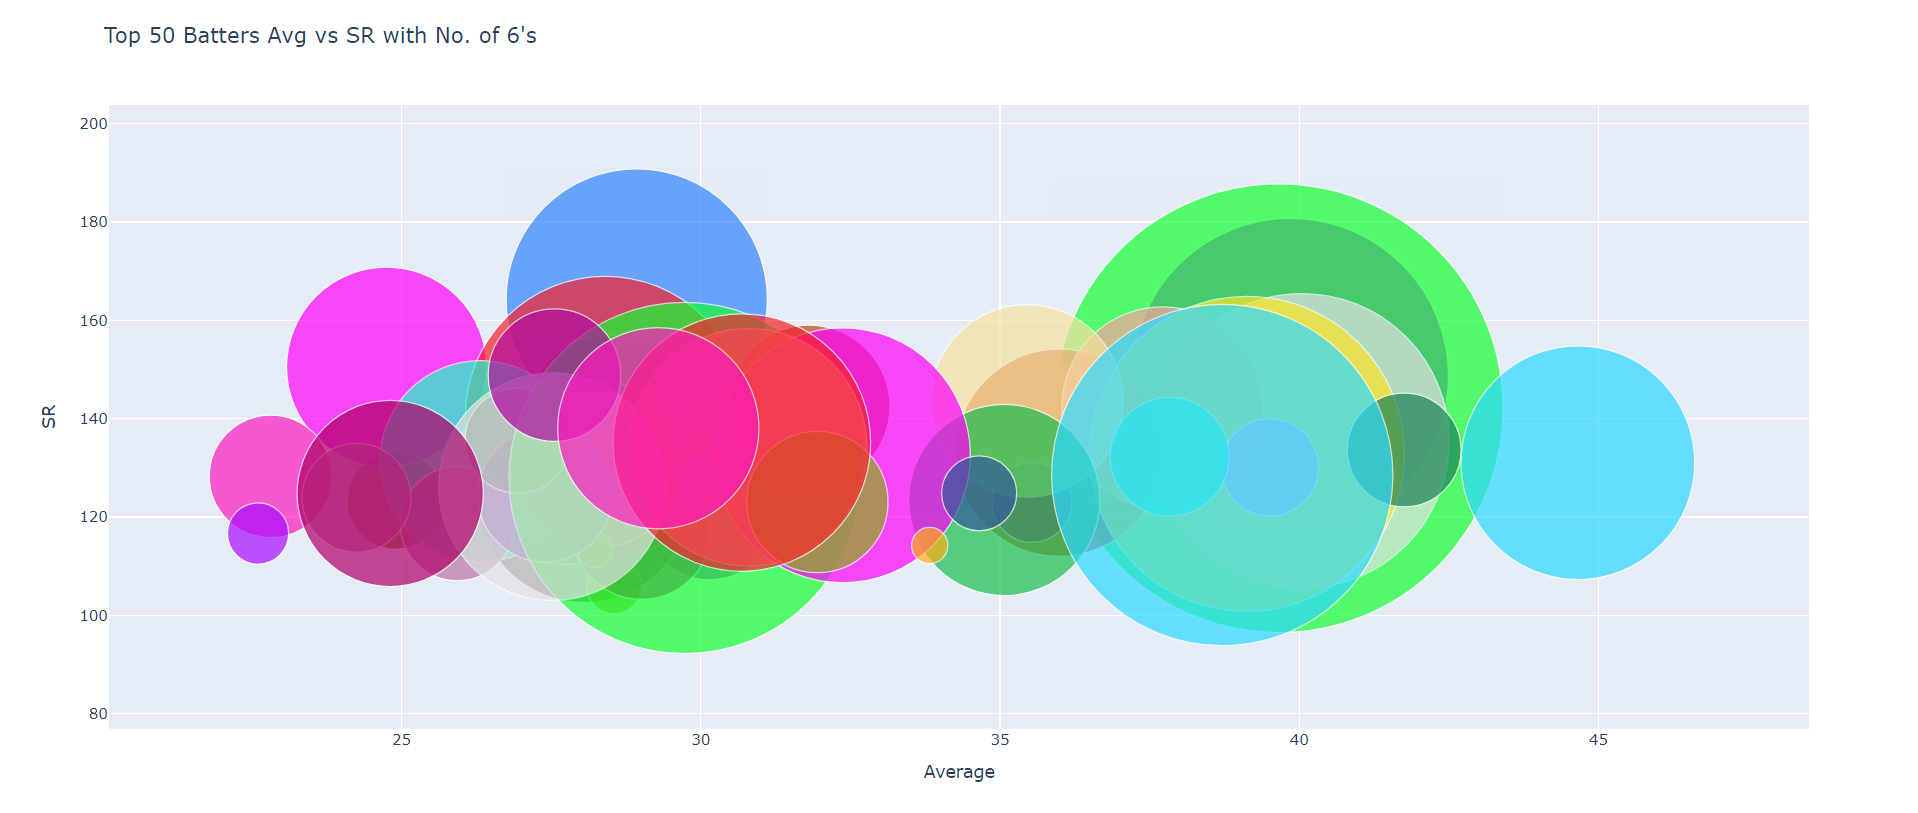


## Box Graph


In [97]:
match_agg = delivery_df.groupby(['match_id'])['total_runs'].sum().reset_index()

season_wise_runs = match_agg.merge(match_df, left_on='match_id', right_on='id')[
    ['match_id', 'total_runs', 'season']]

season_wise_runs

,match_id,total_runs,season
0,335982,304,2008
1,335983,447,2008
2,335984,261,2008
3,335985,331,2008
4,335986,222,2008
...,...,...,...
1090,1426307,429,2024
1091,1426309,323,2024
1092,1426310,346,2024
1093,1426311,314,2024


In [98]:
trace = go.Box(x = season_wise_runs['total_runs'], name = 'All Season')

data = [trace]

layout = go.Layout(title = "Total Score Analysis",
                   xaxis = {'title': 'Total Score'}
                   )


fig = go.Figure(data = data, layout = layout)

pyo.plot(fig, filename = 'boxGraph.html')

'boxGraph.html'

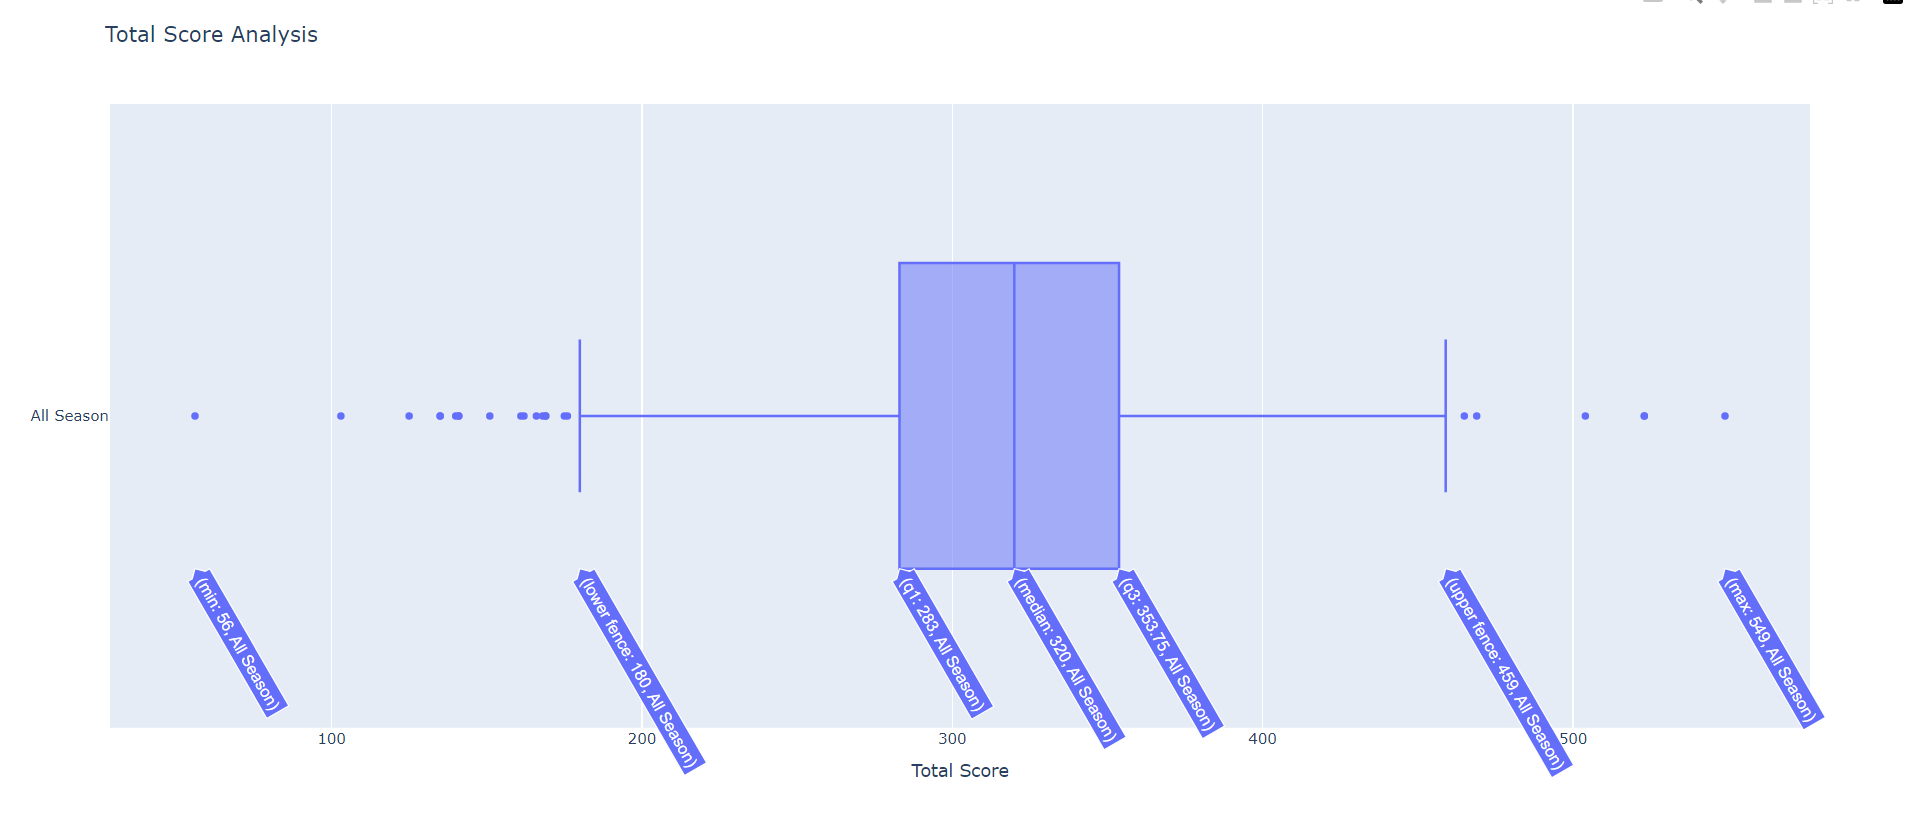

In [101]:
trace1 = go.Box(x = season_wise_runs[season_wise_runs['season'] == 2024]['total_runs'], name = '2024')

trace2 = go.Box(x = season_wise_runs[season_wise_runs['season'] == 2008]['total_runs'], name = '2008', marker=dict(color = '#00A65A'))

data = [trace1, trace2]

layout = go.Layout(title = "Total Score Analysis",
                   xaxis = {'title': 'Total Score'}
                   )


fig = go.Figure(data = data, layout = layout)

pyo.plot(fig, filename = 'boxGraphComparison.html')

'boxGraphComparison.html'

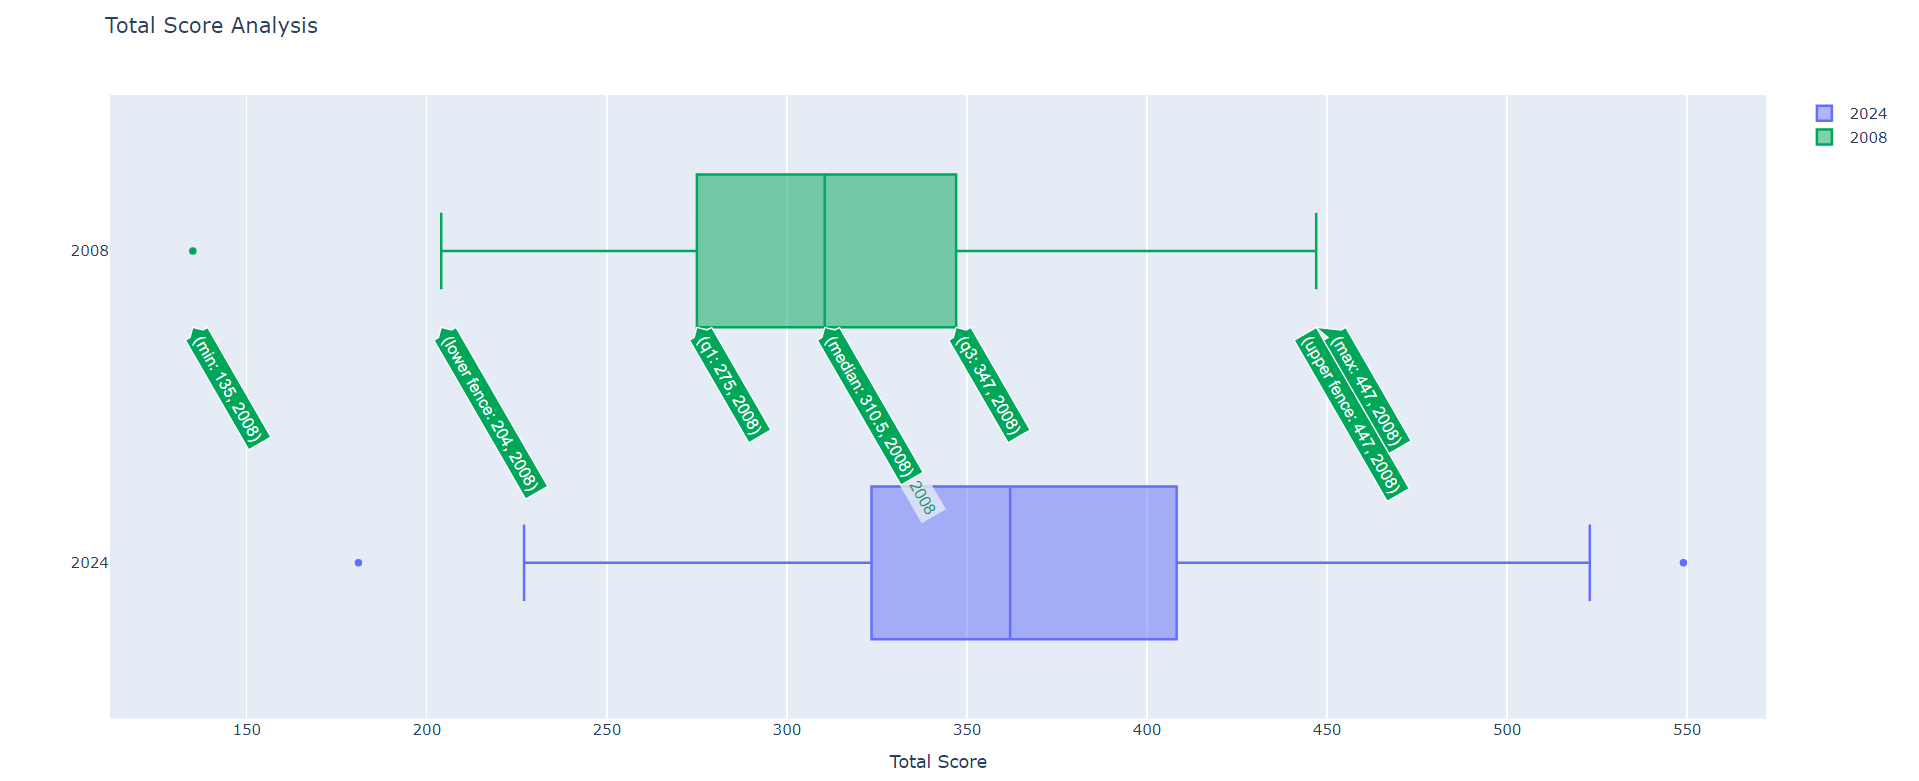

## Distribution Plot

In [104]:
hist_data = [avg['avg']] # Passing Columns

group_lables = ['Average']

fig = ff.create_distplot(hist_data, group_lables)

pyo.plot(fig, filename='distGraph.html')

'distGraph.html'

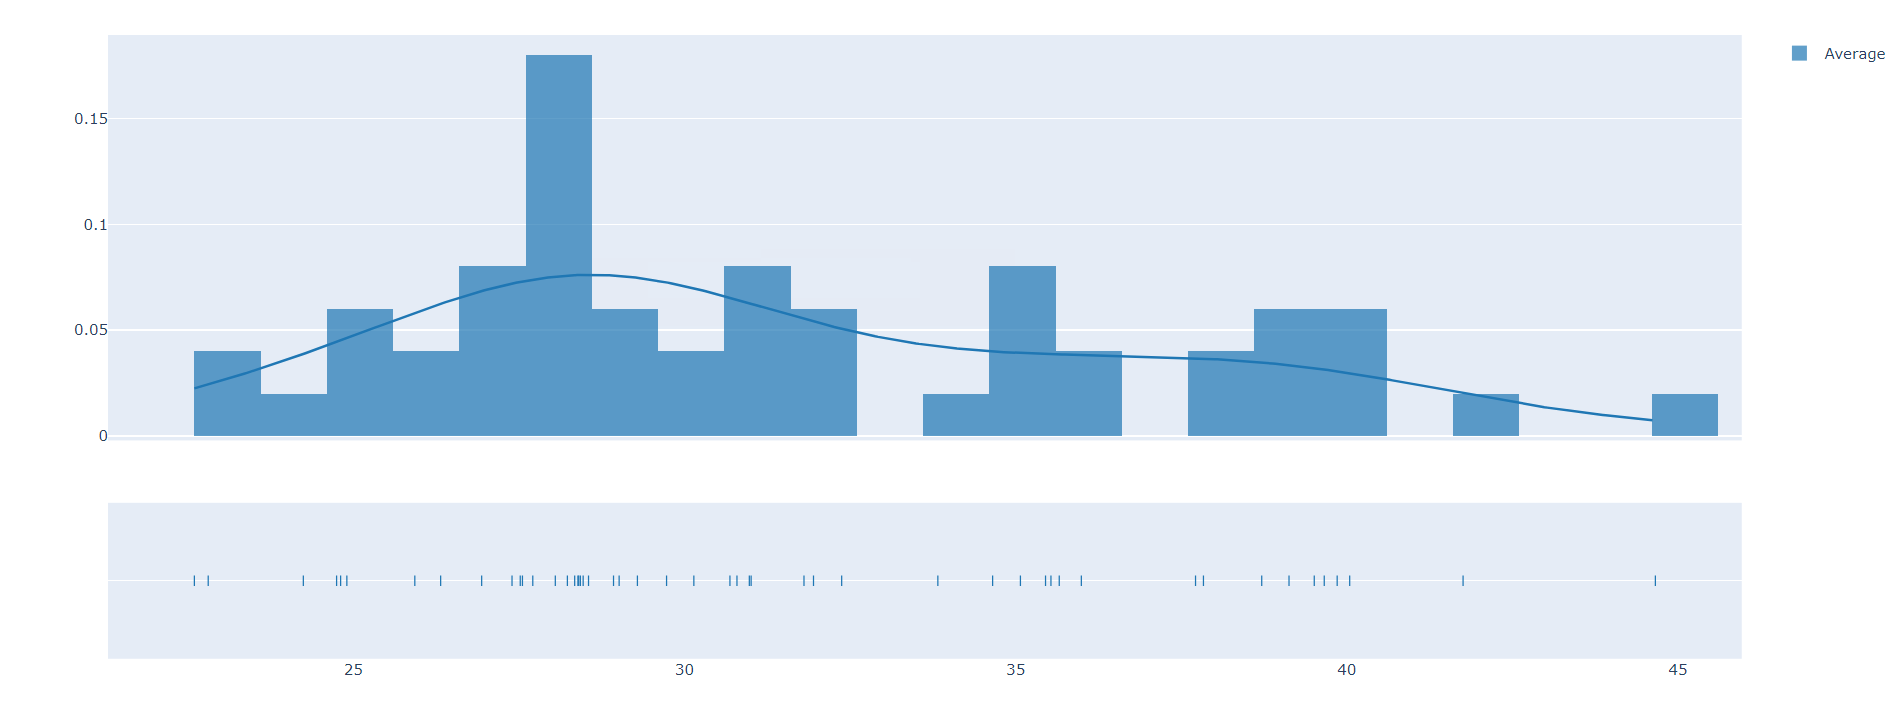

## Histogram Graph

In [107]:
minBall150 = delivery_df.groupby('batter')['batsman_runs'].count() > 150
minBall150 = minBall150[minBall150].index.tolist()

minBall150Df = delivery_df[delivery_df['batter'].isin(minBall150)]

runs = minBall150Df.groupby('batter')['batsman_runs'].sum()
balls = minBall150Df.groupby('batter')['batsman_runs'].count()

sr = (runs / balls) * 100

sr = sr.reset_index()

sr

,batter,batsman_runs
0,A Ashish Reddy,142.857143
1,A Badoni,125.544554
2,A Manohar,127.624309
3,A Mishra,86.590909
4,A Symonds,124.711908
...,...,...
235,Y Venugopal Rao,113.872832
236,YBK Jaiswal,146.757991
237,YK Pathan,138.046272
238,YV Takawale,104.918033


In [109]:
trace = go.Histogram(x = sr['batsman_runs'], name = 'SR Variation', xbins=dict(size=2))

data = [trace]

layout = go.Layout(title = "SR Analysis",
                   xaxis = {'title': 'SR'}
                   )


fig = go.Figure(data = data, layout = layout)

pyo.plot(fig, filename = 'histogramGraph.html')

'histogramGraph.html'

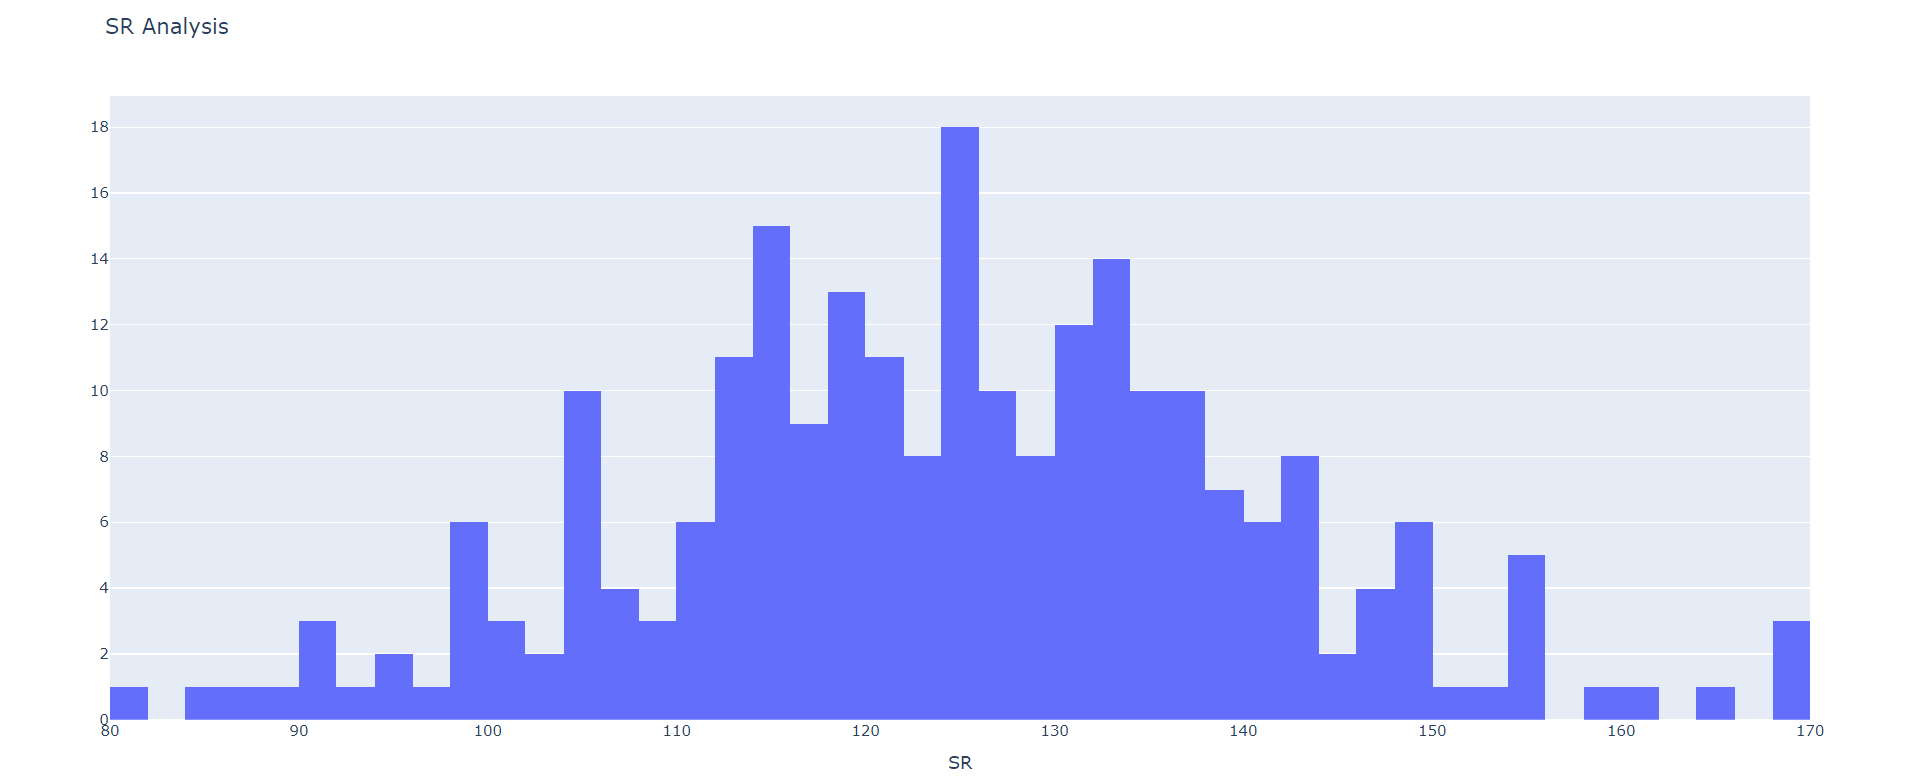

## HeatMap Graph

In [126]:
# Filter sixes
sixes = delivery_df[delivery_df['batsman_runs'] == 6]

# Group by batting_team and over, then count sixes
sixes_count = sixes.groupby(['batting_team', 'over'])['batsman_runs'].count().reset_index()
sixes_count

,batting_team,over,batsman_runs
0,Chennai Super Kings,0,9
1,Chennai Super Kings,1,36
2,Chennai Super Kings,2,67
3,Chennai Super Kings,3,71
4,Chennai Super Kings,4,75
...,...,...,...
371,Sunrisers Hyderabad,15,56
372,Sunrisers Hyderabad,16,59
373,Sunrisers Hyderabad,17,73
374,Sunrisers Hyderabad,18,94


In [130]:
trace = go.Heatmap(x = sixes_count['batting_team'], y = sixes_count['over'], z = sixes_count['batsman_runs'])

data = [trace]

layout = go.Layout(title='Six HeatMap',
                xaxis={'title': 'Batting Team'},
                yaxis={'title': 'Over'})


fig = go.Figure(data = data, layout = layout)

pyo.plot(fig, filename = 'heatMapGraph.html')

'heatMapGraph.html'

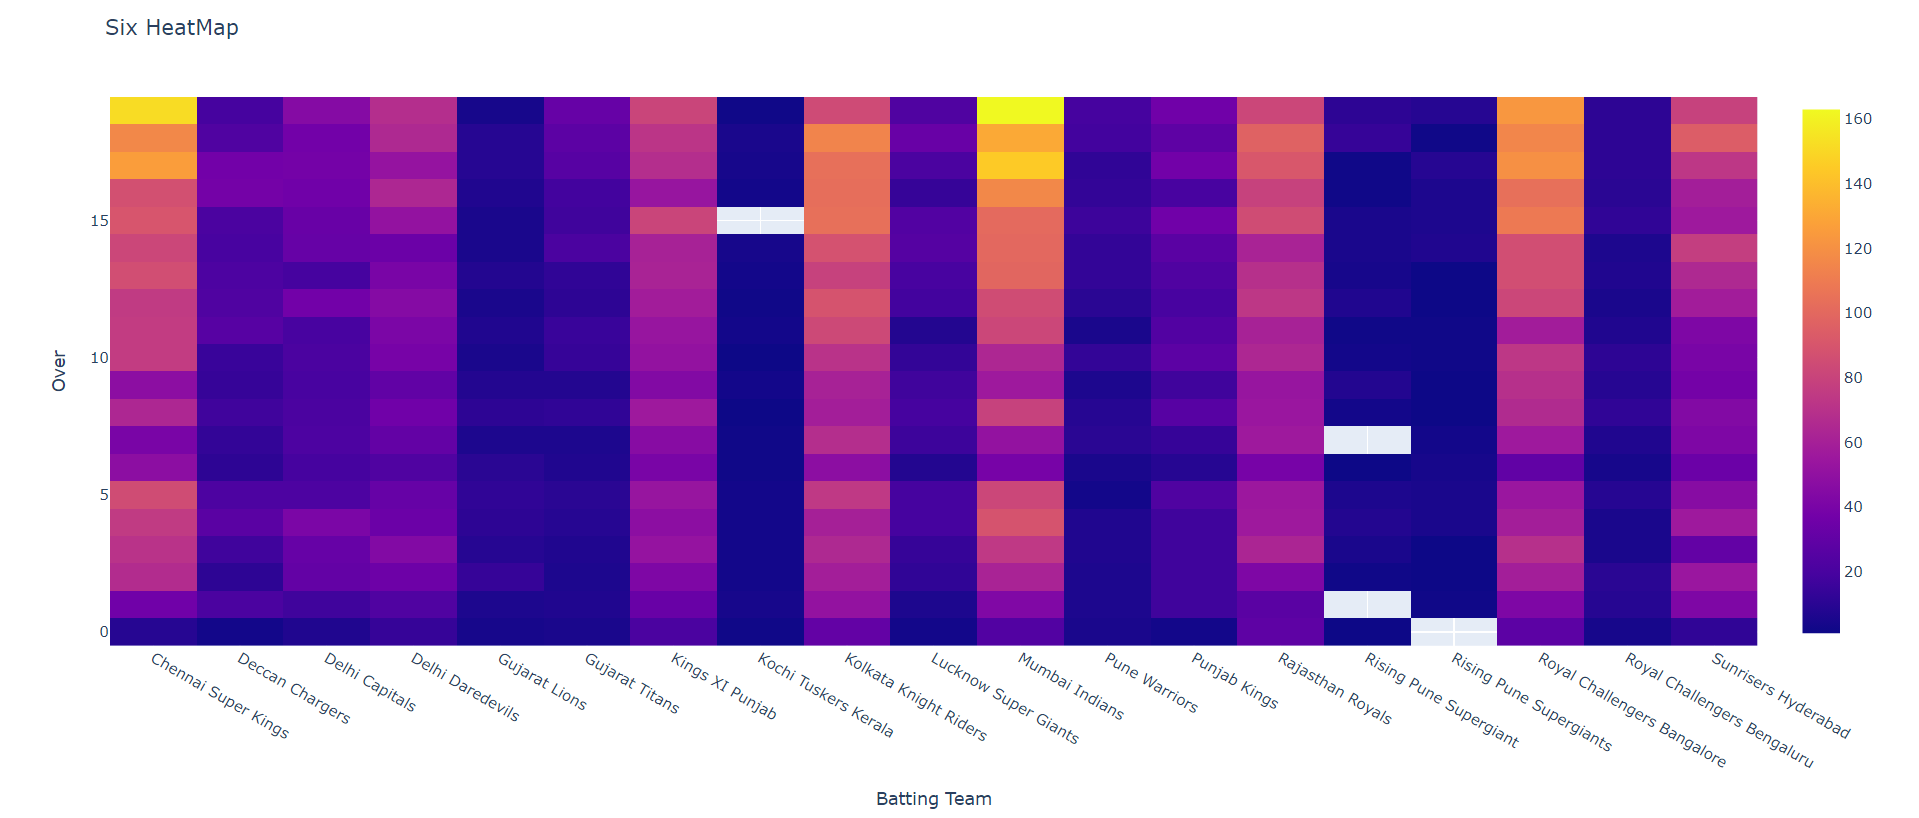